<a href="https://colab.research.google.com/github/33577/suicideRatePrediction/blob/master/Suicide_rate_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import data

In [0]:
import pandas as pd
df1 = pd.read_csv('suicide_rates.csv')
df2 = pd.read_csv('countries_of_the_world.csv')


In [0]:
df3 = pd.read_csv('EIU.csv')
df4 = pd.read_csv('World_countries_env_vars.csv')

In [0]:
df1_2010 = df1[df1.year == 2010]
# df1_2010.head()

In [251]:
df1_2010.drop('suicides_no', axis=1, inplace=True)
#df1_2010.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [252]:
df1_2010.drop('population', axis=1, inplace=True)
df1_2010.drop('country-year', axis=1, inplace=True)
df1_2010.drop('HDI for year', axis=1, inplace=True)
df1_2010.drop('year', axis=1, inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [253]:
df1_2010.head()

,country,sex,age,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
252,Albania,male,55-74 years,8.27,"11,926,953,259",4359,Silent
253,Albania,male,35-54 years,5.38,"11,926,953,259",4359,Generation X
254,Albania,male,25-34 years,5.01,"11,926,953,259",4359,Generation X
255,Albania,male,75+ years,3.94,"11,926,953,259",4359,Silent
256,Albania,male,15-24 years,3.58,"11,926,953,259",4359,Millenials


In [254]:
# 나중에 앞으로 빼자 
# column 이름에 스페이스바 지우기 
df1_2010.columns = df1_2010.columns.str.replace(' ', '')
df1_2010.head()

,country,sex,age,suicides/100kpop,gdp_for_year($),gdp_per_capita($),generation
252,Albania,male,55-74 years,8.27,"11,926,953,259",4359,Silent
253,Albania,male,35-54 years,5.38,"11,926,953,259",4359,Generation X
254,Albania,male,25-34 years,5.01,"11,926,953,259",4359,Generation X
255,Albania,male,75+ years,3.94,"11,926,953,259",4359,Silent
256,Albania,male,15-24 years,3.58,"11,926,953,259",4359,Millenials


In [255]:
df1_2010.drop('gdp_for_year($)', axis=1, inplace=True)
df1_2010.drop('gdp_per_capita($)', axis=1, inplace=True)
df1_2010.drop('generation', axis=1, inplace=True)
df1_2010.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,country,sex,age,suicides/100kpop
252,Albania,male,55-74 years,8.27
253,Albania,male,35-54 years,5.38
254,Albania,male,25-34 years,5.01
255,Albania,male,75+ years,3.94
256,Albania,male,15-24 years,3.58


In [256]:
df2.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,22.00,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [257]:
df1_2010.head()

,country,sex,age,suicides/100kpop
252,Albania,male,55-74 years,8.27
253,Albania,male,35-54 years,5.38
254,Albania,male,25-34 years,5.01
255,Albania,male,75+ years,3.94
256,Albania,male,15-24 years,3.58


In [258]:
df2['Climate'].value_counts()


2.0    111
3.0     48
1.0     29
5.0      8
4.0      6
6.0      3
Name: Climate, dtype: int64

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

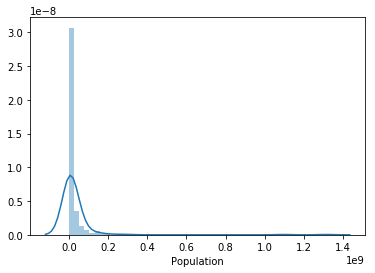

In [260]:
sns.distplot(df2['Population'])

## check null value 


In [261]:
df2_na = (df2.isnull().sum() / len(df2)) * 100
df2_na = df2_na.drop(df2_na[df2_na==0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'missing ratio': df2_na})
missing_data.head(20)

,missing ratio
Climate,9.691630
Literacy (%),7.929515
Industry,7.048458
Service,6.607930
Agriculture,6.607930
Deathrate,1.762115
Phones (per 1000),1.762115
Net migration,1.762115
Birthrate,1.321586
Infant mortality (per 1000 births),1.321586


In [262]:
df3_na = (df3.isnull().sum() / len(df3)) * 100
df3_na = df3_na.drop(df3_na[df3_na==0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'missing ratio': df3_na})
missing_data.head(20)

,missing ratio
EIU10CC,4.278075
EIU10RL,4.278075
EIU10RQ,4.278075
EIU10GE,4.278075
EIU10PV,4.278075
EIU10VA,2.673797
Unnamed: 0,2.139037
Code,1.604278


In [263]:
df4_na = (df4.isnull().sum() / len(df4)) * 100
df4_na = df4_na.drop(df4_na[df4_na==0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'missing ratio': df4_na})
missing_data.head(20)

,missing ratio
wind,22.633745
tree_canopy_cover,4.526749
cloudiness,3.292181
temp_coldestQuart,2.469136
slope,2.469136
aspect,2.469136
rain_warmestQuart,2.469136
elevation,2.469136
temp_annual_range,2.469136
temp_diurnal_range,2.469136


### fill Something to missing values

In [0]:
## TODO 0 이 아니라 업계 평균으로 바꾸기 

df2['Climate'] = df2['Climate'].fillna(0)
df2_column_headers = list(df2.columns.values)
for c in df2_column_headers:
  df2[c] = df2[c].fillna(0)


In [265]:
df2['Climate'].value_counts()

2.0    111
3.0     48
1.0     29
0.0     22
5.0      8
4.0      6
6.0      3
Name: Climate, dtype: int64

In [0]:
## TODO 0 이 아니라 업계 평균으로 바꾸기 

df3_column_headers = list(df3.columns.values)
for c in df3_column_headers:
  df3[c] = df3[c].fillna(0)

In [0]:
## TODO 0 이 아니라 업계 평균으로 바꾸기 

df4_column_headers = list(df4.columns.values)
for c in df4_column_headers:
  df4[c] = df4[c].fillna(0)

In [268]:
# df1_2010은 missing value가 없다.
df1_2010_na = (df1_2010.isnull().sum() / len(df1_2010)) * 100
df1_2010_na = df1_2010_na.drop(df1_2010_na[df1_2010_na==0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'missing ratio': df1_2010_na})
missing_data.head(20)

,missing ratio


## df1_2010 df2 합치기

In [269]:
df1_2010.head()

,country,sex,age,suicides/100kpop
252,Albania,male,55-74 years,8.27
253,Albania,male,35-54 years,5.38
254,Albania,male,25-34 years,5.01
255,Albania,male,75+ years,3.94
256,Albania,male,15-24 years,3.58


In [270]:
df2.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,22.00,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.000,0.000,0.000
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.000,0.000,0.000


In [0]:
df1_2010.columns = df1_2010.columns.str.replace('country', 'Country')



In [272]:
df1_2010[df1_2010.Country=='Albania']

,Country,sex,age,suicides/100kpop
252,Albania,male,55-74 years,8.27
253,Albania,male,35-54 years,5.38
254,Albania,male,25-34 years,5.01
255,Albania,male,75+ years,3.94
256,Albania,male,15-24 years,3.58
257,Albania,female,25-34 years,3.27
258,Albania,female,75+ years,3.10
259,Albania,female,35-54 years,3.04
260,Albania,female,55-74 years,2.90
261,Albania,female,15-24 years,2.28


In [273]:
df2[df2.Country=='Andorra ']

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.0,6.6,4.05,19000.0,100.0,497.2,2.22,0.0,97.78,3.0,8.71,6.25,0.0,0.0,0.0


In [274]:
df2['Country'] = df2['Country'].str.strip()
df2[df2.Country=='Andorra']

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.0,6.6,4.05,19000.0,100.0,497.2,2.22,0.0,97.78,3.0,8.71,6.25,0.0,0.0,0.0


### df3 processing

In [275]:
df3.columns = df3.columns.str.replace('Unnamed: 0', 'Country')
df3.drop('Code', axis=1, inplace=True)
df3.head()

,Country,EIU10VA,EIU10PV,EIU10GE,EIU10RQ,EIU10RL,EIU10CC
0,Aruba,0.813,0.75,0.625,0.90,0.875,0.75
1,Afghanistan,0.155,0.10,0.000,0.15,0.094,0.00
2,Angola,0.291,0.60,0.250,0.55,0.281,0.00
3,Albania,0.543,0.45,0.250,0.55,0.375,0.25
4,United Arab Emirates,0.220,0.75,0.500,0.70,0.594,0.50


In [276]:
df4.head()

,Country,accessibility_to_cities,elevation,aspect,slope,cropland_cover,tree_canopy_cover,isothermality,rain_coldestQuart,rain_driestMonth,rain_driestQuart,rain_mean_annual,rain_seasonailty,rain_warmestQuart,rain_wettestMonth,rain_wettestQuart,temp_annual_range,temp_coldestQuart,temp_diurnal_range,temp_driestQuart,temp_max_warmestMonth,temp_mean_annual,temp_min_coldestMonth,temp_seasonality,temp_warmestQuart,temp_wettestQuart,wind,cloudiness
0,Russia,2143.587912,448.533542,178.456969,0.486310,7.381210,20.356473,19.351714,63.279186,15.345187,52.450745,434.729235,49.685742,181.575443,69.307804,184.997820,50.631191,-24.743686,9.922328,-19.847401,19.952679,-6.261876,-30.678512,145.221422,12.206959,11.549561,3.013606,210.990816
1,United States of America,638.757539,759.251226,166.560382,0.529687,19.743870,16.728462,32.952882,141.820680,28.787362,100.500560,671.911733,43.415171,198.817687,93.486073,249.429018,39.053796,-5.388305,12.751939,1.420303,26.776731,6.602248,-12.277065,93.460602,18.518984,13.579272,3.586282,180.274639
2,Canada,3220.715175,508.284763,169.290792,0.397220,3.796340,20.587476,19.862863,80.937465,19.612252,66.220983,453.318423,46.837965,161.861002,64.995707,177.361250,45.963724,-23.193780,9.232454,-19.120410,16.428661,-6.831690,-29.535063,128.934783,9.503740,7.649331,3.378886,231.498702
3,Antarctica,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,302.807829
4,Indonesia,504.884807,342.053688,168.270799,0.909755,13.240866,55.478882,84.942402,673.078720,136.174030,449.847542,2728.355157,29.436566,677.470571,326.216210,904.111711,10.004346,24.396248,8.508100,24.827528,30.133801,24.993327,20.129455,4.163968,25.392019,24.934237,1.366648,293.095107


In [278]:
all_data = df1_2010.merge(df2, on='Country').merge(df3,on='Country').merge(df4,on='Country')
all_data.head()

,Country,sex,age,suicides/100kpop,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,EIU10VA,EIU10PV,EIU10GE,EIU10RQ,EIU10RL,EIU10CC,accessibility_to_cities,elevation,aspect,slope,cropland_cover,tree_canopy_cover,isothermality,rain_coldestQuart,rain_driestMonth,rain_driestQuart,rain_mean_annual,rain_seasonailty,rain_warmestQuart,rain_wettestMonth,rain_wettestQuart,temp_annual_range,temp_coldestQuart,temp_diurnal_range,temp_driestQuart,temp_max_warmestMonth,temp_mean_annual,temp_min_coldestMonth,temp_seasonality,temp_warmestQuart,temp_wettestQuart,wind,cloudiness
0,Albania,male,55-74 years,8.27,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,22.0,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,0.543,0.45,0.25,0.55,0.375,0.25,73.830856,651.815541,192.130326,1.890075,23.346087,12.804629,33.169413,392.508789,40.08848,138.15462,1151.097474,38.546629,138.33467,159.046065,435.874661,27.081549,3.579896,9.114174,19.573206,26.275636,11.467487,-0.805913,62.668515,19.577416,5.26745,2.472694,181.131113
1,Albania,male,35-54 years,5.38,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,22.0,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,0.543,0.45,0.25,0.55,0.375,0.25,73.830856,651.815541,192.130326,1.890075,23.346087,12.804629,33.169413,392.508789,40.08848,138.15462,1151.097474,38.546629,138.33467,159.046065,435.874661,27.081549,3.579896,9.114174,19.573206,26.275636,11.467487,-0.805913,62.668515,19.577416,5.26745,2.472694,181.131113
2,Albania,male,25-34 years,5.01,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,22.0,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,0.543,0.45,0.25,0.55,0.375,0.25,73.830856,651.815541,192.130326,1.890075,23.346087,12.804629,33.169413,392.508789,40.08848,138.15462,1151.097474,38.546629,138.33467,159.046065,435.874661,27.081549,3.579896,9.114174,19.573206,26.275636,11.467487,-0.805913,62.668515,19.577416,5.26745,2.472694,181.131113
3,Albania,male,75+ years,3.94,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,22.0,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,0.543,0.45,0.25,0.55,0.375,0.25,73.830856,651.815541,192.130326,1.890075,23.346087,12.804629,33.169413,392.508789,40.08848,138.15462,1151.097474,38.546629,138.33467,159.046065,435.874661,27.081549,3.579896,9.114174,19.573206,26.275636,11.467487,-0.805913,62.668515,19.577416,5.26745,2.472694,181.131113
4,Albania,male,15-24 years,3.58,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,22.0,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,0.543,0.45,0.25,0.55,0.375,0.25,73.830856,651.815541,192.130326,1.890075,23.346087,12.804629,33.169413,392.508789,40.08848,138.15462,1151.097474,38.546629,138.33467,159.046065,435.874661,27.081549,3.579896,9.114174,19.573206,26.275636,11.467487,-0.805913,62.668515,19.577416,5.26745,2.472694,181.131113


In [279]:
all_data  = all_data.replace(to_replace = r'female', value = 2, regex=True)
all_data  = all_data.replace(to_replace = r'male', value = 1, regex=True)


all_data  = all_data.replace(to_replace = r'5-14 years', value = 10, regex=True)
all_data  = all_data.replace(to_replace = r'15-24 years', value = 20, regex=True)
all_data  = all_data.replace(to_replace = r'25-34 years', value = 30, regex=True)
all_data  = all_data.replace(to_replace = r'35-54 years', value = 45, regex=True)
all_data  = all_data.replace(to_replace = r'55-74 years', value = 65, regex=True)
all_data  = all_data.replace(to_replace = r'75\+ years', value = 80, regex=True)

all_data.head()

,Country,sex,age,suicides/100kpop,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,EIU10VA,EIU10PV,EIU10GE,EIU10RQ,EIU10RL,EIU10CC,accessibility_to_cities,elevation,aspect,slope,cropland_cover,tree_canopy_cover,isothermality,rain_coldestQuart,rain_driestMonth,rain_driestQuart,rain_mean_annual,rain_seasonailty,rain_warmestQuart,rain_wettestMonth,rain_wettestQuart,temp_annual_range,temp_coldestQuart,temp_diurnal_range,temp_driestQuart,temp_max_warmestMonth,temp_mean_annual,temp_min_coldestMonth,temp_seasonality,temp_warmestQuart,temp_wettestQuart,wind,cloudiness
0,Albania,1,65,8.27,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,22.0,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,0.543,0.45,0.25,0.55,0.375,0.25,73.830856,651.815541,192.130326,1.890075,23.346087,12.804629,33.169413,392.508789,40.08848,138.15462,1151.097474,38.546629,138.33467,159.046065,435.874661,27.081549,3.579896,9.114174,19.573206,26.275636,11.467487,-0.805913,62.668515,19.577416,5.26745,2.472694,181.131113
1,Albania,1,45,5.38,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,22.0,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,0.543,0.45,0.25,0.55,0.375,0.25,73.830856,651.815541,192.130326,1.890075,23.346087,12.804629,33.169413,392.508789,40.08848,138.15462,1151.097474,38.546629,138.33467,159.046065,435.874661,27.081549,3.579896,9.114174,19.573206,26.275636,11.467487,-0.805913,62.668515,19.577416,5.26745,2.472694,181.131113
2,Albania,1,30,5.01,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,22.0,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,0.543,0.45,0.25,0.55,0.375,0.25,73.830856,651.815541,192.130326,1.890075,23.346087,12.804629,33.169413,392.508789,40.08848,138.15462,1151.097474,38.546629,138.33467,159.046065,435.874661,27.081549,3.579896,9.114174,19.573206,26.275636,11.467487,-0.805913,62.668515,19.577416,5.26745,2.472694,181.131113
3,Albania,1,80,3.94,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,22.0,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,0.543,0.45,0.25,0.55,0.375,0.25,73.830856,651.815541,192.130326,1.890075,23.346087,12.804629,33.169413,392.508789,40.08848,138.15462,1151.097474,38.546629,138.33467,159.046065,435.874661,27.081549,3.579896,9.114174,19.573206,26.275636,11.467487,-0.805913,62.668515,19.577416,5.26745,2.472694,181.131113
4,Albania,1,20,3.58,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,22.0,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,0.543,0.45,0.25,0.55,0.375,0.25,73.830856,651.815541,192.130326,1.890075,23.346087,12.804629,33.169413,392.508789,40.08848,138.15462,1151.097474,38.546629,138.33467,159.046065,435.874661,27.081549,3.579896,9.114174,19.573206,26.275636,11.467487,-0.805913,62.668515,19.577416,5.26745,2.472694,181.131113


In [280]:
corr = all_data.corr(method='pearson').drop(['suicides/100kpop']).sort_values('suicides/100kpop', ascending=False)['suicides/100kpop']
#corr = all_data.corr(method = 'pearson')
corr

age                                   0.336724
Literacy (%)                          0.237051
Deathrate                             0.229197
cropland_cover                        0.159545
tree_canopy_cover                     0.149062
temp_seasonality                      0.136754
Arable (%)                            0.126872
rain_driestMonth                      0.123549
rain_driestQuart                      0.120253
EIU10PV                               0.103329
EIU10VA                               0.102260
temp_annual_range                     0.096252
Phones (per 1000)                     0.091088
cloudiness                            0.090718
Climate                               0.083903
EIU10RL                               0.070613
aspect                                0.067224
Service                               0.053184
wind                                  0.042344
EIU10CC                               0.042267
accessibility_to_cities               0.040889
EIU10RQ      

In [281]:
#승준
#corr = all_data.corr(method = 'pearson')
#corr
#df2['Net migration'] = df2['Net migration'].astype(float)
#all_data = pd.to_numeric(all_data)
all_data.dtypes

Country                                object
sex                                     int64
age                                     int64
suicides/100kpop                      float64
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                          

In [282]:
all_data.shape

(912, 56)

In [0]:
all_data.drop('Country', axis=1, inplace=True)
all_data.drop('Region', axis=1, inplace=True)

In [0]:
all_data = all_data.sample(frac=1)

In [0]:
all_data = all_data.reset_index(drop=True)

In [0]:
from google.colab import files

all_data.to_csv('all_data.csv')
files.download('all_data.csv')

# Import all_data

In [289]:
import pandas as pd
all_data_ip = pd.read_csv('all_data.csv')
all_data_ip.head()

,sex,age,suicides/100kpop,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,EIU10VA,EIU10PV,EIU10GE,EIU10RQ,EIU10RL,EIU10CC,accessibility_to_cities,elevation,aspect,slope,cropland_cover,tree_canopy_cover,isothermality,rain_coldestQuart,rain_driestMonth,rain_driestQuart,rain_mean_annual,rain_seasonailty,rain_warmestQuart,rain_wettestMonth,rain_wettestQuart,temp_annual_range,temp_coldestQuart,temp_diurnal_range,temp_driestQuart,temp_max_warmestMonth,temp_mean_annual,temp_min_coldestMonth,temp_seasonality,temp_warmestQuart,temp_wettestQuart,wind,cloudiness
0,1,20,4.22,885359,11437,77.4,4.92,16.29,18.61,21500,82.5,232.0,1.64,0.27,98.09,1,15.56,4.72,0.002,0.801,0.197,0.373,0.85,0.500,0.65,0.781,1.0,53.784643,27.303294,171.712225,0.000000,0.579871,0.000000,37.348469,41.976456,0.000000,0.000000,73.214459,97.460826,0.000000,17.476899,46.197717,27.392610,18.228788,10.381044,34.233503,40.402529,26.818223,13.009919,62.896291,34.233503,19.018687,4.525724,82.370607
1,2,30,1.83,5450661,43094,126.5,16.97,2.48,4.56,31100,100.0,614.6,54.02,0.19,45.79,3,11.13,10.36,0.018,0.246,0.735,0.945,0.95,1.000,0.90,0.969,1.0,55.215716,27.273146,189.665083,0.000000,65.145728,10.083755,26.289449,144.152886,37.990401,124.820589,726.664688,23.837714,193.981230,81.735940,237.113280,23.176428,0.347741,6.212308,2.449917,19.469035,7.725706,-3.707393,59.314811,15.318852,10.054044,4.689151,239.080290
2,2,30,10.52,4076140,268680,15.2,5.63,4.05,5.85,21600,99.0,441.7,5.60,6.99,87.41,3,13.76,7.53,0.043,0.273,0.684,0.901,0.85,0.875,0.85,0.938,1.0,212.293162,473.410505,181.962447,1.277507,16.705058,36.779979,46.282227,444.403457,97.244057,343.627770,1654.207980,15.578256,364.211221,170.024955,482.905057,19.756409,5.384525,9.233446,11.454097,20.595750,10.206648,0.839341,36.216211,14.732554,8.218788,3.457695,204.888713
3,2,80,1.55,3927188,13790,284.8,3.63,-1.46,8.24,16800,94.1,283.1,3.95,5.52,90.53,2,12.77,7.65,0.010,0.450,0.540,0.625,0.80,0.375,0.65,0.719,0.5,25.705814,215.465652,147.039266,1.063235,5.057848,34.459769,74.092769,242.180997,68.709852,239.702172,1866.971980,37.658576,571.440599,240.982781,667.691949,13.655975,22.401189,10.196885,22.463370,30.552476,24.107175,16.896501,12.210361,25.427360,25.209797,2.325772,183.697237
4,1,65,1.02,3102229,212460,14.6,0.98,0.28,19.51,13100,75.8,85.5,0.00,0.14,99.74,1,36.24,3.81,0.027,0.390,0.583,0.299,0.65,0.500,0.70,0.656,0.5,292.580311,274.748435,166.574871,0.300171,0.473386,0.019527,46.815615,22.904216,0.326600,3.128100,59.269700,95.675443,6.358654,17.351090,37.722615,23.418103,20.492627,11.069175,27.235580,37.768067,26.310487,14.349964,41.414416,31.066399,24.063273,3.903983,70.323073


# Modeling

In [0]:
ntrain = 800
y_train = all_data_ip['suicides/100kpop'].values[:ntrain]
y_test = all_data_ip['suicides/100kpop'].values[ntrain:]
all_data_ip.drop('suicides/100kpop', axis=1, inplace=True)
train = all_data_ip[:ntrain]
test = all_data_ip[ntrain:]

In [354]:
all_data_ip.dtypes

sex                                     int64
age                                     int64
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                      int64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                                 int64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
EIU10VA                               float64
EIU10PV                           

In [387]:
all_data_ip.head()

,sex,age,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,EIU10VA,EIU10PV,EIU10GE,EIU10RQ,EIU10RL,EIU10CC,accessibility_to_cities,elevation,aspect,slope,cropland_cover,tree_canopy_cover,isothermality,rain_coldestQuart,rain_driestMonth,rain_driestQuart,rain_mean_annual,rain_seasonailty,rain_warmestQuart,rain_wettestMonth,rain_wettestQuart,temp_annual_range,temp_coldestQuart,temp_diurnal_range,temp_driestQuart,temp_max_warmestMonth,temp_mean_annual,temp_min_coldestMonth,temp_seasonality,temp_warmestQuart,temp_wettestQuart,wind,cloudiness
0,1,20,885359,11437,77.4,4.92,16.29,18.61,21500,82.5,232.0,1.64,0.27,98.09,1,15.56,4.72,0.002,0.801,0.197,0.373,0.85,0.500,0.65,0.781,1.0,53.784643,27.303294,171.712225,0.000000,0.579871,0.000000,37.348469,41.976456,0.000000,0.000000,73.214459,97.460826,0.000000,17.476899,46.197717,27.392610,18.228788,10.381044,34.233503,40.402529,26.818223,13.009919,62.896291,34.233503,19.018687,4.525724,82.370607
1,2,30,5450661,43094,126.5,16.97,2.48,4.56,31100,100.0,614.6,54.02,0.19,45.79,3,11.13,10.36,0.018,0.246,0.735,0.945,0.95,1.000,0.90,0.969,1.0,55.215716,27.273146,189.665083,0.000000,65.145728,10.083755,26.289449,144.152886,37.990401,124.820589,726.664688,23.837714,193.981230,81.735940,237.113280,23.176428,0.347741,6.212308,2.449917,19.469035,7.725706,-3.707393,59.314811,15.318852,10.054044,4.689151,239.080290
2,2,30,4076140,268680,15.2,5.63,4.05,5.85,21600,99.0,441.7,5.60,6.99,87.41,3,13.76,7.53,0.043,0.273,0.684,0.901,0.85,0.875,0.85,0.938,1.0,212.293162,473.410505,181.962447,1.277507,16.705058,36.779979,46.282227,444.403457,97.244057,343.627770,1654.207980,15.578256,364.211221,170.024955,482.905057,19.756409,5.384525,9.233446,11.454097,20.595750,10.206648,0.839341,36.216211,14.732554,8.218788,3.457695,204.888713
3,2,80,3927188,13790,284.8,3.63,-1.46,8.24,16800,94.1,283.1,3.95,5.52,90.53,2,12.77,7.65,0.010,0.450,0.540,0.625,0.80,0.375,0.65,0.719,0.5,25.705814,215.465652,147.039266,1.063235,5.057848,34.459769,74.092769,242.180997,68.709852,239.702172,1866.971980,37.658576,571.440599,240.982781,667.691949,13.655975,22.401189,10.196885,22.463370,30.552476,24.107175,16.896501,12.210361,25.427360,25.209797,2.325772,183.697237
4,1,65,3102229,212460,14.6,0.98,0.28,19.51,13100,75.8,85.5,0.00,0.14,99.74,1,36.24,3.81,0.027,0.390,0.583,0.299,0.65,0.500,0.70,0.656,0.5,292.580311,274.748435,166.574871,0.300171,0.473386,0.019527,46.815615,22.904216,0.326600,3.128100,59.269700,95.675443,6.358654,17.351090,37.722615,23.418103,20.492627,11.069175,27.235580,37.768067,26.310487,14.349964,41.414416,31.066399,24.063273,3.903983,70.323073


In [0]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV

In [0]:
#Validation function
n_folds = 10

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [0]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=3))


In [0]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))


In [0]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5) #kernel = 'rbf' , 'sigmoid' 


In [0]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [0]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [0]:
# A parameter grid for XGBoost
#params = {'min_child_weight':[i/10.0 for i in range(5,18)], 'gamma':[i/100.0 for i in range(3,6)],  
#'subsample':[i/10.0 for i in range(4,9)], 'colsample_bytree':[i/10.0 for i in range(4,8)], 'max_depth': [2,3,4]}

# Initialize XGB and GridSearch
#xgb = XGBRegressor(nthread=-1) 

#grid = GridSearchCV(xgb, params)
#grid.fit(train, y_train)

In [0]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [0]:
model_svr = SVR(C=1, cache_size=200, coef0=0, degree=3, epsilon=0.0, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
params = {'coef0':[0, 0.1, 0.5, 1], 'C' :[0.1, 0.2, 0.5, 1], 'epsilon':[i/10.0 for i in range(0,6)]}

In [0]:
regr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=20, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [368]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))
score = rmsle_cv(model_svr)
print("SVR score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42561.01159020958, tolerance: 19.95801627727778
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40423.76078490125, tolerance: 19.725876892000002
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41396.621936448566, tolerance: 19.919283798000002
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41764.5879665


Lasso score: 11.6993 (2.1789)



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41698.04089656678, tolerance: 19.919283798000002
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42073.0499965236, tolerance: 19.400313071944446
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37921.565571425104, tolerance: 17.777210126444448
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39922.6306297

ElasticNet score: 11.6980 (2.1792)



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:189

Kernel Ridge score: 19.1538 (3.1054)

Gradient Boosting score: 7.9948 (1.9407)

Xgboost score: 8.3866 (1.6308)

LGBM score: 9.1370 (1.8802)

SVR score: 16.8552 (3.8839)



In [375]:
# RF
score = rmsle_cv(regr)
print("RF score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

RF score: 7.9807 (1.7934)



#Prediction

In [0]:
def rmsle(y, y_pred): 
    return np.sqrt(mean_squared_error(y, y_pred))

In [377]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

4.197759439135301


In [378]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

6.725111306748381


In [379]:
GBoost.fit(train,y_train)
GB_train_pred = GBoost.predict(train)
GB_pred = np.expm1(GBoost.predict(test.values))
print(rmsle(y_train, GB_train_pred))

4.661662705658354


In [402]:
regr.fit(train,y_train)
regr_train_pred = regr.predict(train)
regr_pred = np.expm1(regr.predict(test.values))
print(rmsle(y_train, regr_train_pred))

3.186130696999766


In [0]:
ensemble = xgb_pred*0.25 + lgb_pred*0.1 + GB_pred*0.25 + regr_pred*0.4 

In [0]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (10,10)


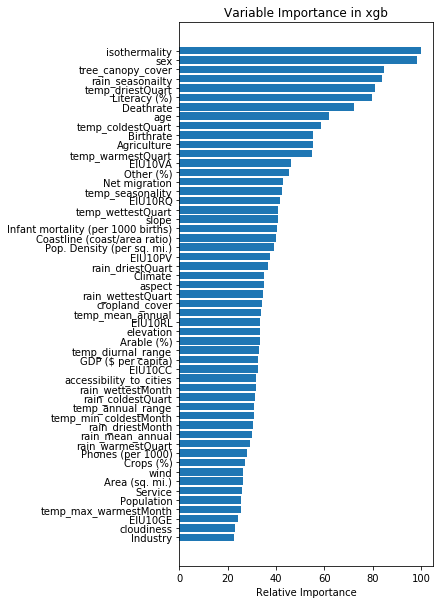

In [388]:

# Plot feature importance
feature_importance = model_xgb.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, all_data_ip.columns.values[sorted_idx])

# plt.tick_params(axis='y', which='major', labelsize=10)

plt.xlabel('Relative Importance')
plt.title('Variable Importance in xgb')
plt.show()

In [389]:
all_data_ip.columns.values[sorted_idx]

array(['Industry', 'cloudiness', 'EIU10GE', 'temp_max_warmestMonth',
       'Population', 'Service', 'Area (sq. mi.)', 'wind', 'Crops (%)',
       'Phones (per 1000)', 'rain_warmestQuart', 'rain_mean_annual',
       'rain_driestMonth', 'temp_min_coldestMonth', 'temp_annual_range',
       'rain_coldestQuart', 'rain_wettestMonth',
       'accessibility_to_cities', 'EIU10CC', 'GDP ($ per capita)',
       'temp_diurnal_range', 'Arable (%)', 'elevation', 'EIU10RL',
       'temp_mean_annual', 'cropland_cover', 'rain_wettestQuart',
       'aspect', 'Climate', 'rain_driestQuart', 'EIU10PV',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Infant mortality (per 1000 births)', 'slope', 'temp_wettestQuart',
       'EIU10RQ', 'temp_seasonality', 'Net migration', 'Other (%)',
       'EIU10VA', 'temp_warmestQuart', 'Agriculture', 'Birthrate',
       'temp_coldestQuart', 'age', 'Deathrate', 'Literacy (%)',
       'temp_driestQuart', 'rain_seasonailty', 'tree_canopy_cover',

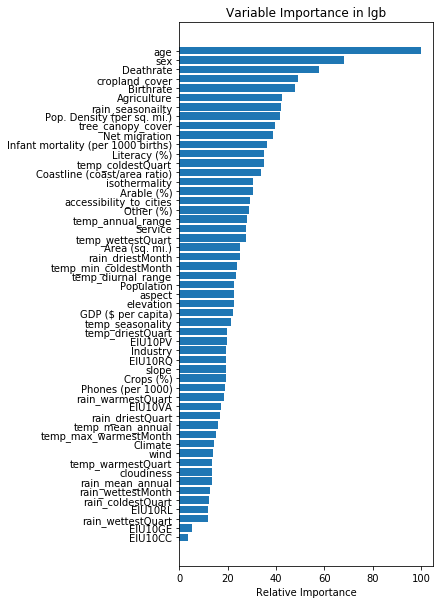

In [390]:

# Plot feature importance
feature_importance = model_lgb.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, all_data_ip.columns.values[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance in lgb')
plt.show()

In [0]:
all_data_ip.columns.values[sorted_idx]

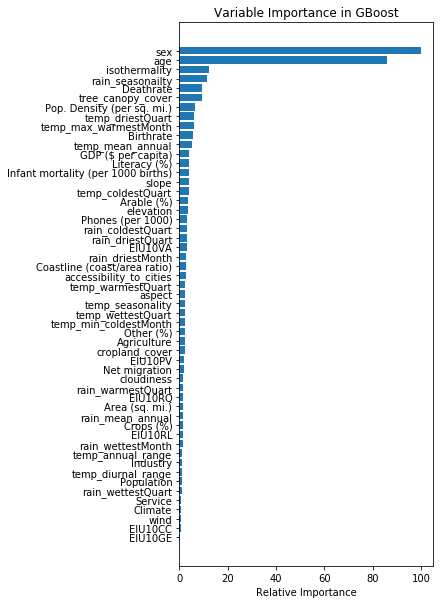

In [392]:

# Plot feature importance
feature_importance = GBoost.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, all_data_ip.columns.values[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance in GBoost')
plt.show()

In [0]:
all_data_ip.columns.values[sorted_idx]

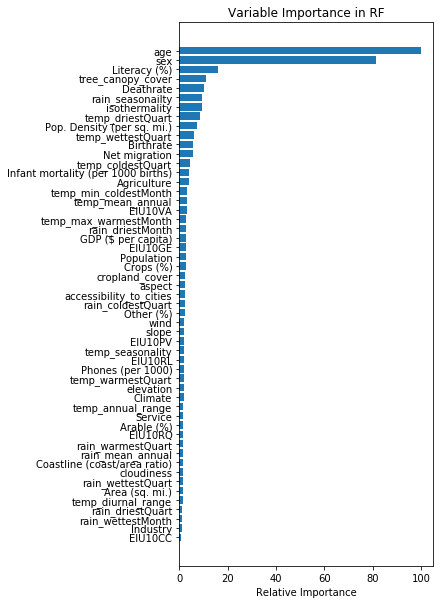

In [404]:
# RF
# Plot feature importance
feature_importance = regr.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, all_data_ip.columns.values[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance in RF')
plt.show()

In [405]:
# mean square error
xgb_mse = np.mean((xgb_pred - y_test)**2)
lgb_mse = np.mean((lgb_pred - y_test)**2)
GB_mse = np.mean((GB_pred - y_test)**2)
regr_mse = np.mean((regr_pred - y_test)**2)

print("xgb_mse:", xgb_mse)
print("lgb_mse:", lgb_mse)
print("GB_mse:", GB_mse)
print("RF_mse:", regr_mse)

xgb_mse: 5.165923556571421e+42
lgb_mse: 2.7337724192395215e+35
GB_mse: 7.281464424421672e+42
RF_mse: 2.192851746901439e+59


In [406]:
xgb_score = model_xgb.score(test, y_test)
lgb_score = model_lgb.score(test, y_test)
GB_score = GBoost.score(test, y_test)
regr_score = regr.score(test, y_test)

print("xgb_score:", xgb_score)
print("lgb_score:", lgb_score)
print("GB_score:", GB_score)
print("RF_score:", regr_score)

xgb_score: 0.664217060534258
lgb_score: 0.6812600015254886
GB_score: 0.8036696989420437
RF_score: 0.859264762679063


In [407]:
print("ensemble_mse", np.mean((ensemble - y_test)**2))

ensemble_mse 3.508562841594525e+58
